## Iris Dataset

In [227]:
%%time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Wall time: 8 ms


In [228]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas.plotting import scatter_matrix
from tqdm import tqdm, tqdm_notebook
from scipy import stats
from sklearn import model_selection
# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

<h4>Descriptive Analysis of dataset</h4>

In [229]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pandas.read_csv('iris.csv', names=names) # via url aumenta latencia
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [230]:
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
37,4.9,3.1,1.5,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
83,6.0,2.7,5.1,1.6,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
42,4.4,3.2,1.3,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
78,6.0,2.9,4.5,1.5,Iris-versicolor
130,7.4,2.8,6.1,1.9,Iris-virginica


In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [232]:
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [233]:
only_numeric_columns = df.iloc[:,:-1]
stats.describe(only_numeric_columns)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.054     , 3.75866667, 1.19866667]), variance=array([0.68569351, 0.18800403, 3.11317942, 0.58241432]), skewness=array([ 0.31175306,  0.33070281, -0.27171195, -0.10394367]), kurtosis=array([-0.57356795,  0.2414433 , -1.3953593 , -1.33524564]))

In [234]:
df.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

<h3>Data Visualizations </h3>

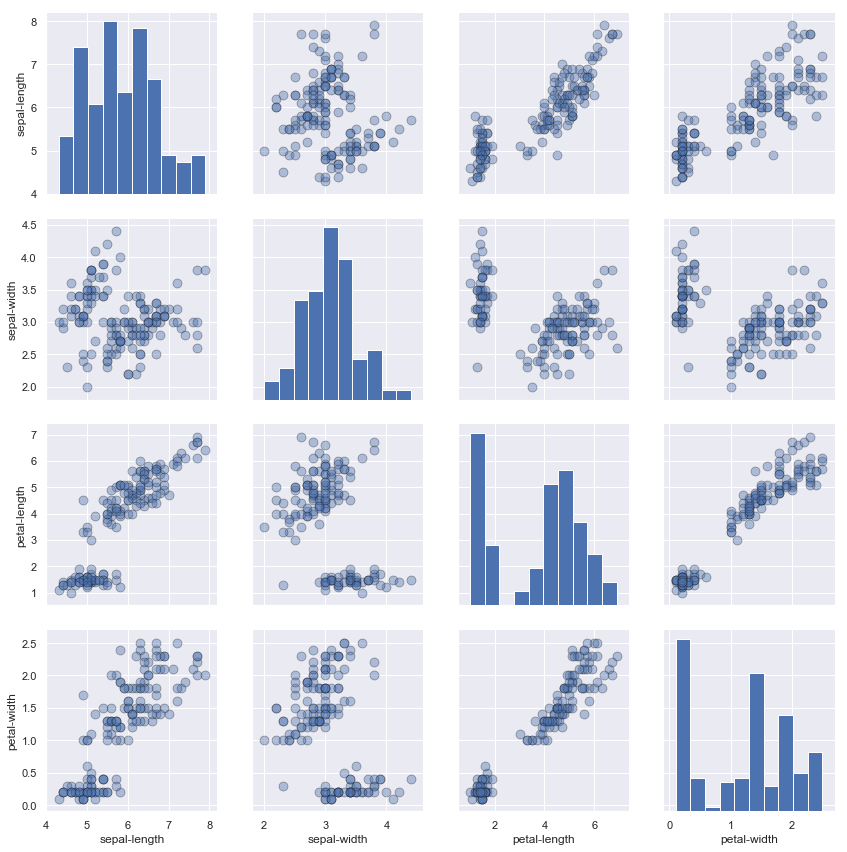

In [235]:
sns.pairplot(df,
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             height = 3)
plt.show()          


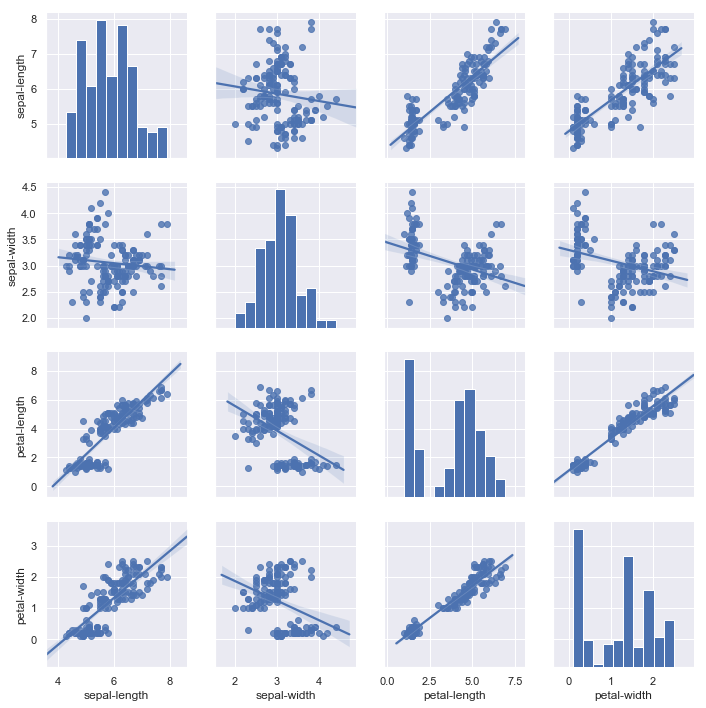

In [236]:
sns.pairplot(df, kind="reg")
plt.show()

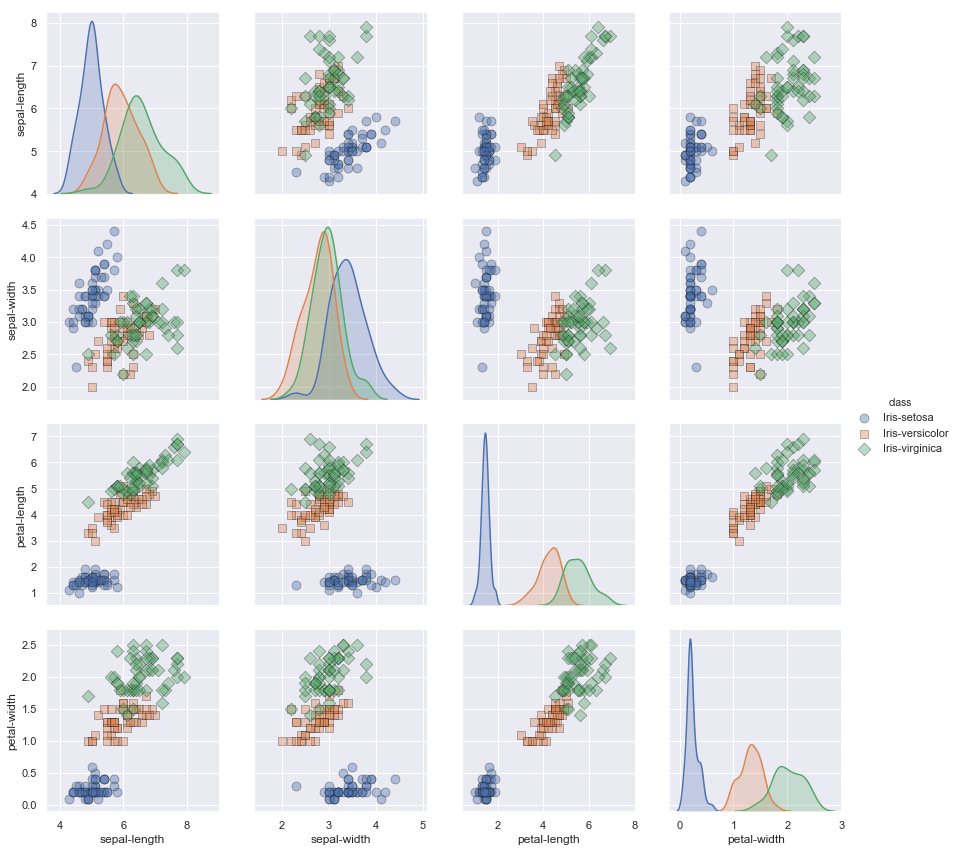

In [237]:
sns.pairplot(df , hue='class',  diag_kind = 'kde',
             plot_kws = {'alpha': 0.4, 's': 80, 'edgecolor': 'k'},
             height = 3, markers=["o", "s", "D"],)
plt.show()

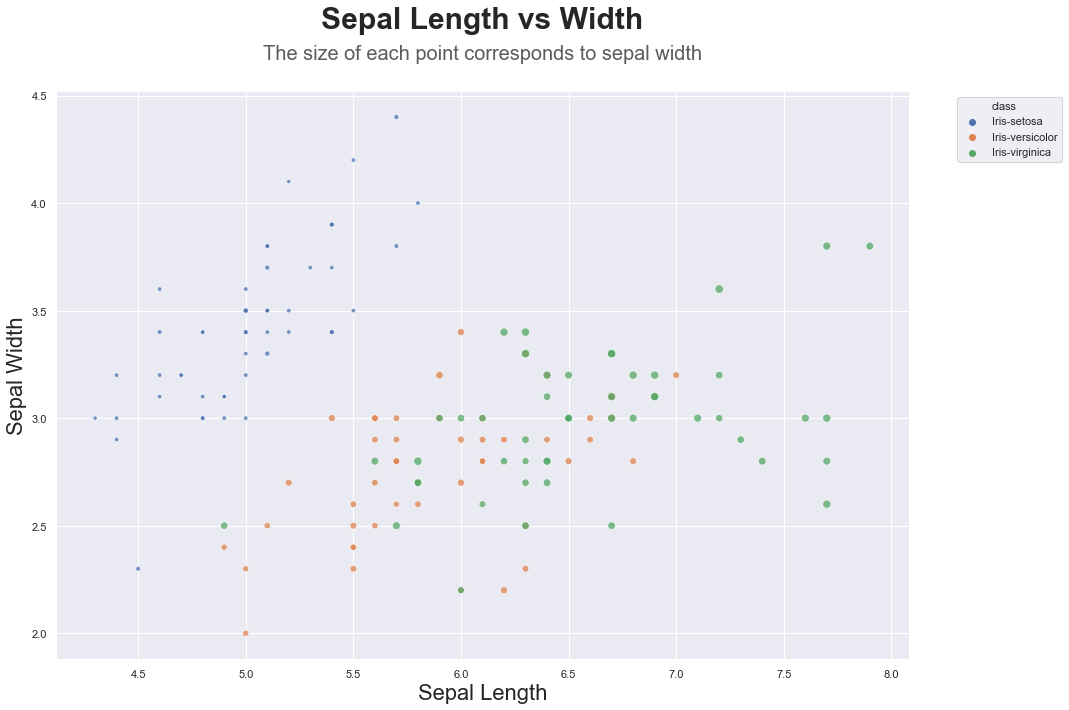

In [238]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    'sepal-length',
    'sepal-width',
    hue='class',
    size='petal-width',
    alpha=0.75,
    legend='brief',
    data=df,
    ax = ax
)

ax.set_xlabel('Sepal Length', size=22)
ax.set_ylabel('Sepal Width', size = 22)

ax.text(x=0.5, y=1.1, s='Sepal Length vs Width', fontsize=30, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='The size of each point corresponds to sepal width', fontsize=20, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

h,l = ax.get_legend_handles_labels()
ax.legend(h[:4],l[:4], bbox_to_anchor=(1.05, 1), loc=2)

fig.tight_layout()
plt.show()

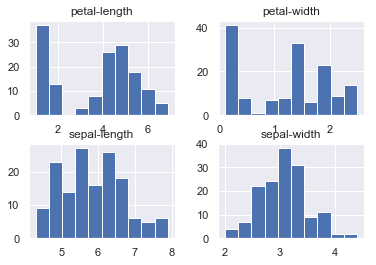

In [239]:
df.hist()
plt.show()

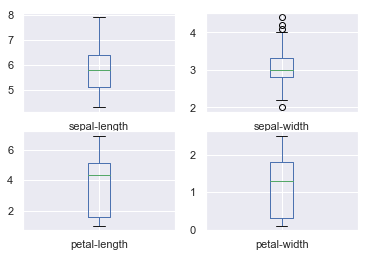

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [240]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()
print(df.describe())

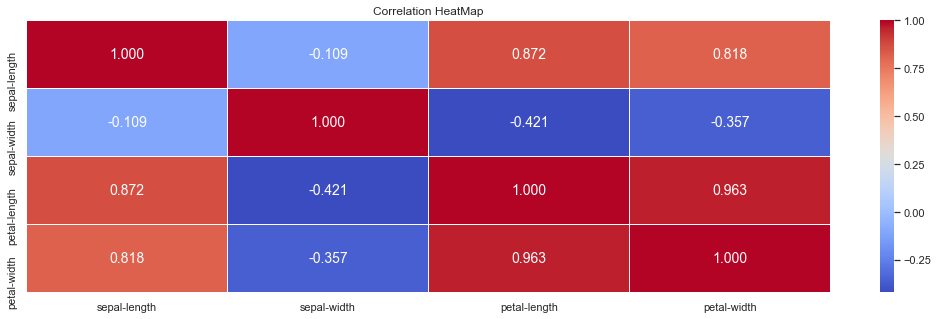

In [241]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5,  cmap='coolwarm', robust=True, fmt=".3f", annot_kws={'size':14})
plt.title("Correlation HeatMap")
plt.show()

<h3>Modeling using ML techniques</h3>

In [ ]:
# Criacao de Modelos 

# 1) Separacao do Dataset de Validacao
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

#2) Opcoes de teste e avalicao metricas
seed = 7
scoring = 'accuracy'

# 3) Algoritmo Spot Check 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# analisa cada modelo em turnos
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# 4) Plotando resultado comparacao dos algoritmos
fig = plt.figure()
fig.suptitle('Comparacao Algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# plt.show()
plt.savefig('plots/benchmark.png')

# 5) Fazendo previsoes no dataset de validacao
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))